In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Motor_Vehicle_Collisions_cpy2.csv')

C:\Users\dougl\AppData\Local\Temp\ipykernel_15020\2640988846.py:1: DtypeWarning: Columns (4,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_cpy2.csv')


# Dropping Unnecessary columns/ information

In [3]:
df.head()

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,HOUSE NUMBER,ROAD,NEIGHBOURHOOD,SUBURB,POSTCODE,day_of_week,is_weekend,CRASH HOUR,is_holiday,holiday_name
0,0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,whitestone expressway,20 avenue,...,NaN,NaN,NaN,NaN,NaN,Saturday,True,2,False,NaN
1,1,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,...,1211,Loring Avenue,NaN,Brooklyn,11208,Saturday,True,9,False,NaN
2,2,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",saratoga avenue,decatur street,...,636,Decatur Street,NaN,Brooklyn,11233,Tuesday,False,8,False,NaN
3,3,2021-04-14,12:47,NaN,NaN,NaN,NaN,NaN,major deegan expressway ramp,NaN,...,NaN,NaN,NaN,NaN,NaN,Wednesday,False,12,False,NaN
4,4,2021-12-14,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",brooklyn queens expressway,NaN,...,NaN,Brooklyn-Queens Expressway,NaN,Brooklyn,11249,Tuesday,False,17,False,NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'FULL ADDRESS', 'HOUSE NUMBER', 'ROAD', 'NEIGHBOURHOOD', 'SUBURB',
       'POSTCODE', 'day_of_week', 'is_weekend', 'CRASH HOUR', 'is_holiday',
       'holiday_name'],
      dtype='object')

In [5]:
cols_to_drop = ['BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'FULL ADDRESS', 'HOUSE NUMBER']
df = df.drop(columns = cols_to_drop)
df.columns

Index(['Unnamed: 0', 'CRASH DATE', 'CRASH TIME', 'LATITUDE', 'LONGITUDE',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'ROAD', 'NEIGHBOURHOOD', 'SUBURB', 'POSTCODE',
       'day_of_week', 'is_weekend', 'CRASH HOUR', 'is_holiday',
       'holiday_name'],
      dtype='object')

In [6]:
print(df.isnull().sum())

Unnamed: 0                             0
CRASH DATE                             0
CRASH TIME                             0
LATITUDE                          139087
LONGITUDE                         139087
NUMBER OF PERSONS INJURED              0
NUMBER OF PERSONS KILLED               0
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6899
CONTRIBUTING FACTOR VEHICLE 2     323898
CONTRIBUTING FACTOR VEHICLE 3    1911284
CONTRIBUTING FACTOR VEHICLE 4    2022871
CONTRIBUTING FACTOR VEHICLE 5    2046664
COLLISION_ID                           0
VEHICLE TYPE CODE 1                14071
VEHICLE TYPE CODE 2               401142
VEHICLE TYPE CODE 3              1916670
VEHICLE TYPE CODE 4              2024026
VEHICLE TYPE CODE 5              2046933
ROAD            

In [7]:
df = df.dropna(subset=['LATITUDE'])

In [8]:
df['NUMBER OF PERSONS KILLED'].value_counts()

NUMBER OF PERSONS KILLED
0.0    1913773
1.0       2662
2.0         67
3.0         12
4.0          4
8.0          1
5.0          1
Name: count, dtype: int64

In [9]:
print(df.isnull().sum())

Unnamed: 0                             0
CRASH DATE                             0
CRASH TIME                             0
LATITUDE                               0
LONGITUDE                              0
NUMBER OF PERSONS INJURED              0
NUMBER OF PERSONS KILLED               0
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6553
CONTRIBUTING FACTOR VEHICLE 2     305200
CONTRIBUTING FACTOR VEHICLE 3    1781385
CONTRIBUTING FACTOR VEHICLE 4    1885697
CONTRIBUTING FACTOR VEHICLE 5    1908032
COLLISION_ID                           0
VEHICLE TYPE CODE 1                13256
VEHICLE TYPE CODE 2               379441
VEHICLE TYPE CODE 3              1786440
VEHICLE TYPE CODE 4              1886778
VEHICLE TYPE CODE 5              1908283
ROAD            

# Time Series 

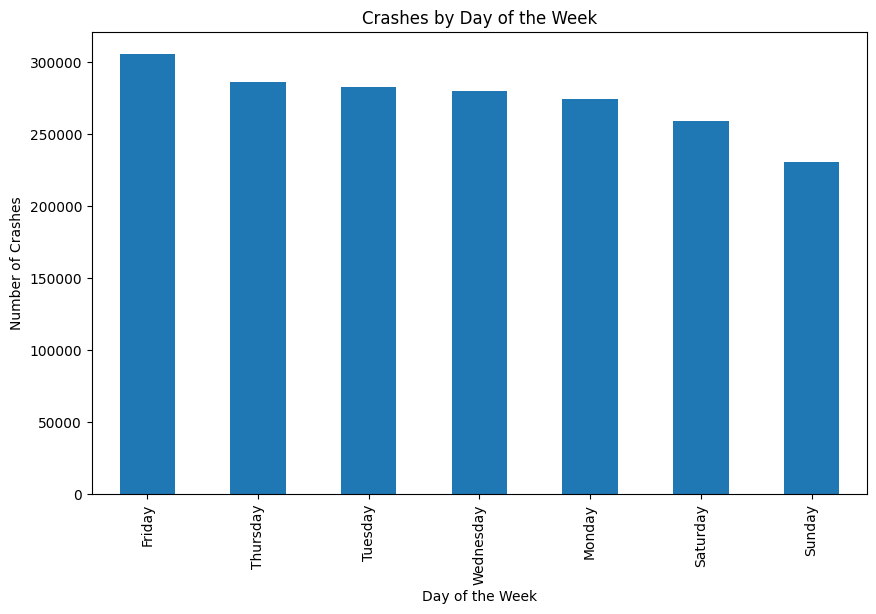

In [10]:
# Count crashes per day of the week
day_counts = df['day_of_week'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.title('Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.show()

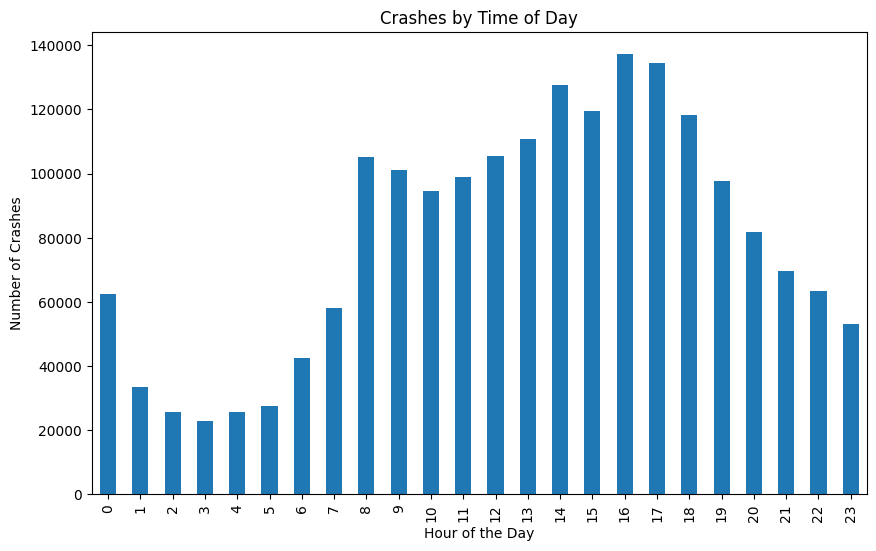

In [11]:
# Count crashes per hour
hour_counts = df['CRASH HOUR'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar')
plt.title('Crashes by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.show()

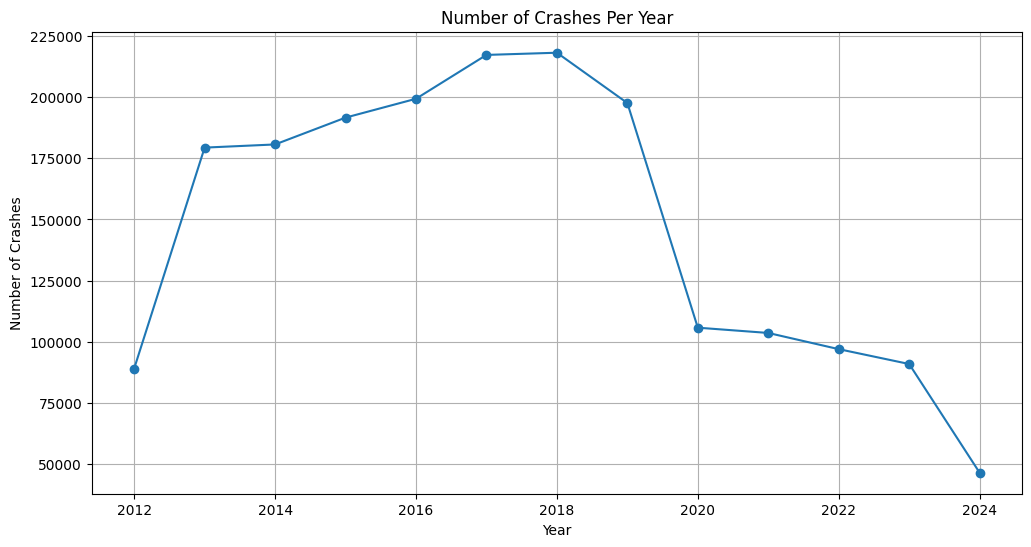

In [12]:
# Convert CRASH DATE to datetime format if not already done
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Group by year and count the number of crashes
crashes_per_year = df.groupby(df['CRASH DATE'].dt.year).size()

# Plot
plt.figure(figsize=(12, 6))
crashes_per_year.plot(kind='line', marker='o')
plt.title('Number of Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

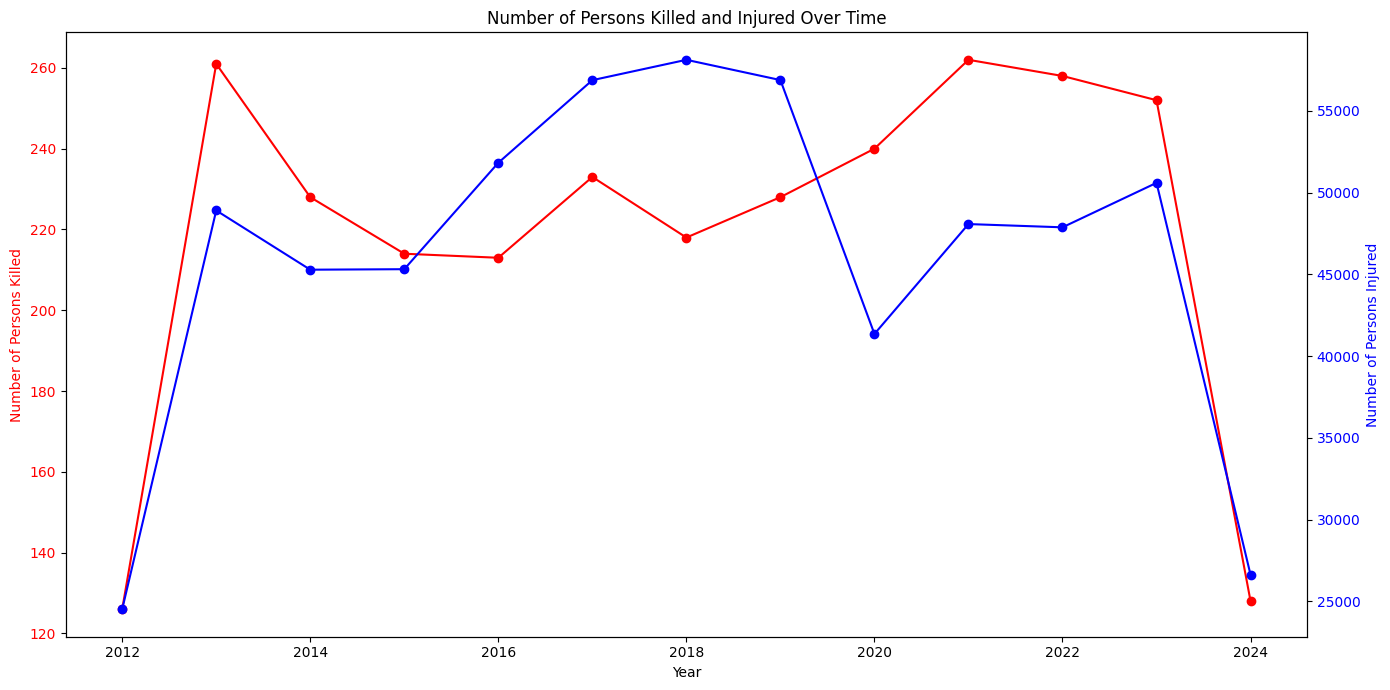

In [13]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Group by year and sum the number of persons killed and injured
annual_stats = df.groupby(df['CRASH DATE'].dt.year).agg({
    'NUMBER OF PERSONS KILLED': 'sum',
    'NUMBER OF PERSONS INJURED': 'sum'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot number of persons killed
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Persons Killed', color='red')
ax1.plot(annual_stats['CRASH DATE'], annual_stats['NUMBER OF PERSONS KILLED'], marker='o', color='red', label='Number of Persons Killed')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for number of persons injured
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Persons Injured', color='blue')
ax2.plot(annual_stats['CRASH DATE'], annual_stats['NUMBER OF PERSONS INJURED'], marker='o', color='blue', label='Number of Persons Injured')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Number of Persons Killed and Injured Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [14]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
unspecified                      650851
driver distraction/impairment    473306
improper driving technique       395188
traffic rule violation           182191
external distraction/obstacle    112390
poor road conditions              42050
alcohol/drug use                  36577
vehicle defect                    14252
electronics use                    3090
police chase                         72
Name: count, dtype: int64

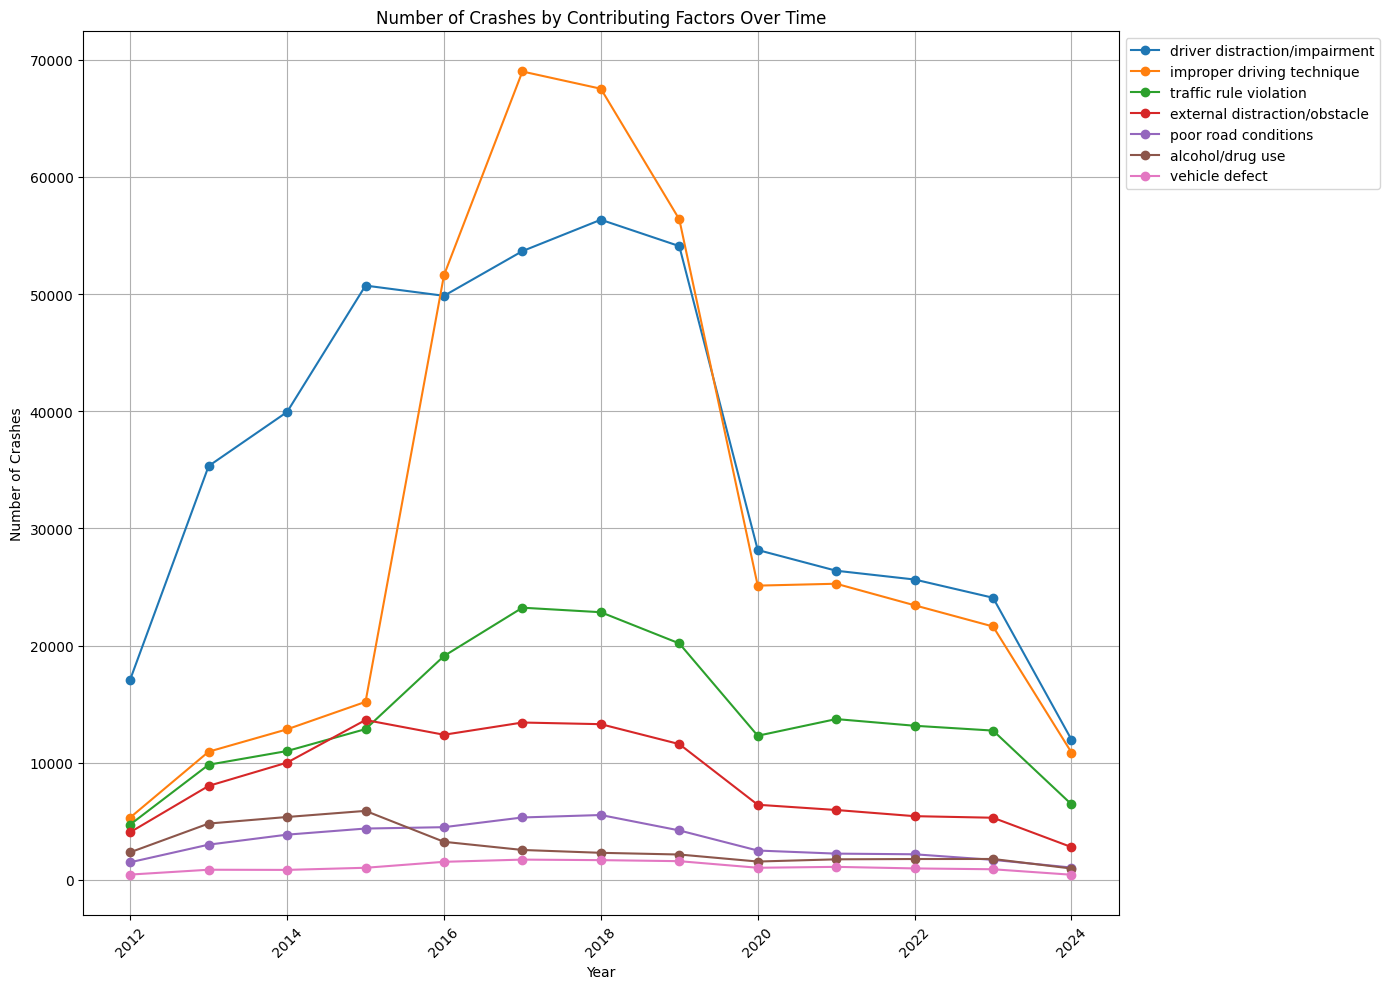

In [15]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Count number of crashes by year and contributing factor
annual_factors = df.groupby([df['CRASH DATE'].dt.year, 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='NUMBER OF CRASHES')

# List of contributing factors to loop through
contributing_factors = [
    'driver distraction/impairment',
    'improper driving technique',
    'traffic rule violation',
    'external distraction/obstacle',
    'poor road conditions',
    'alcohol/drug use',
    'vehicle defect'
]

plt.figure(figsize=(14, 10))

for factor in contributing_factors:
    factor_data = annual_factors[annual_factors['CONTRIBUTING FACTOR VEHICLE 1'] == factor]
    
    plt.plot(factor_data['CRASH DATE'], factor_data['NUMBER OF CRASHES'], marker='o', label=f'{factor}')

plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Contributing Factors Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

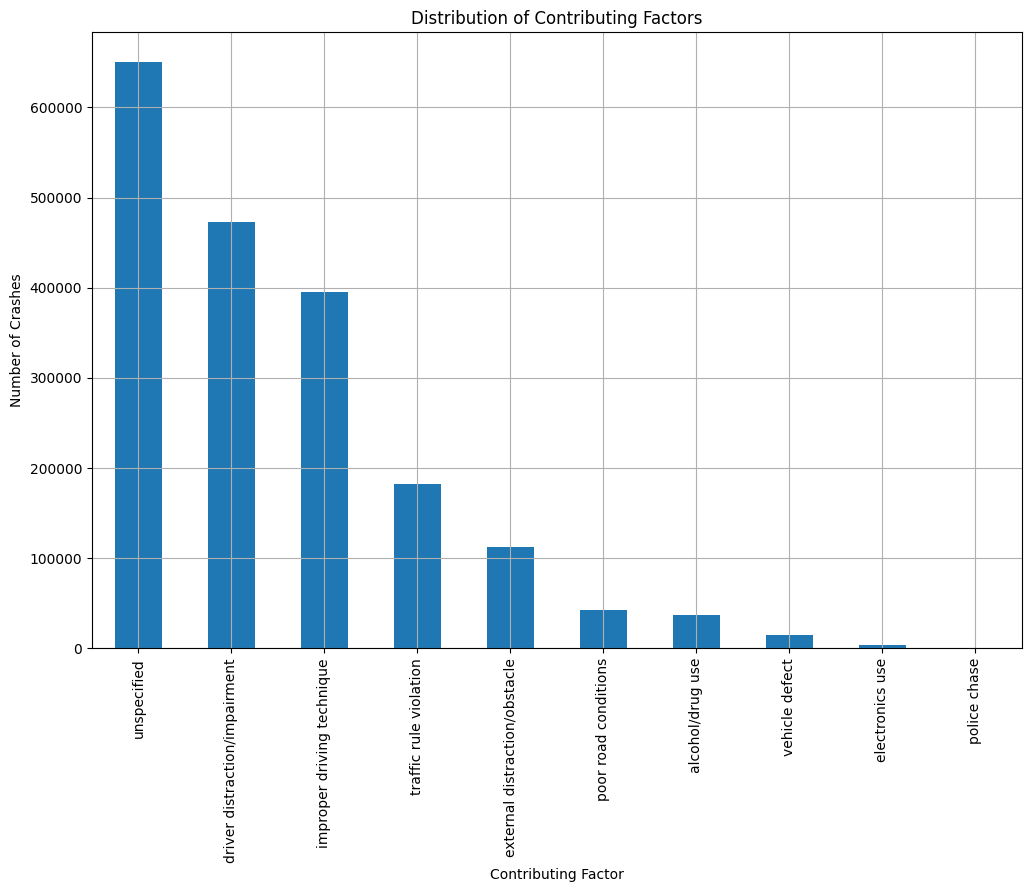

In [16]:
# Count crash types
crash_type_counts = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
crash_type_counts.plot(kind='bar')
plt.title('Distribution of Contributing Factors')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

C:\Users\dougl\AppData\Local\Temp\ipykernel_15020\586958808.py:14: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dougl\AppData\Local\Temp\ipykernel_15020\586958808.py:14: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.tight_layout()
C:\Users\dougl\AppData\Local\Temp\ipykernel_15020\586958808.py:14: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dougl\AppData\Local\Temp\ipykernel_15020\586958808.py:14: UserWarning: Glyph 22830 (\N{CJK UNIFIED IDEOGRAPH-592E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dougl\AppData\Local\Temp\ipykernel_15020\586958808.py:14: UserWarning: Glyph 37324 (\N{CJK UNIFIED IDEOGRAPH-91CC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dougl\AppData\Local\Temp\ipykernel_15020\586958808.py:14: UserWarning: Glyph 20809 (\N{CJK UNIFIED IDEOGRAPH-5149}) mi

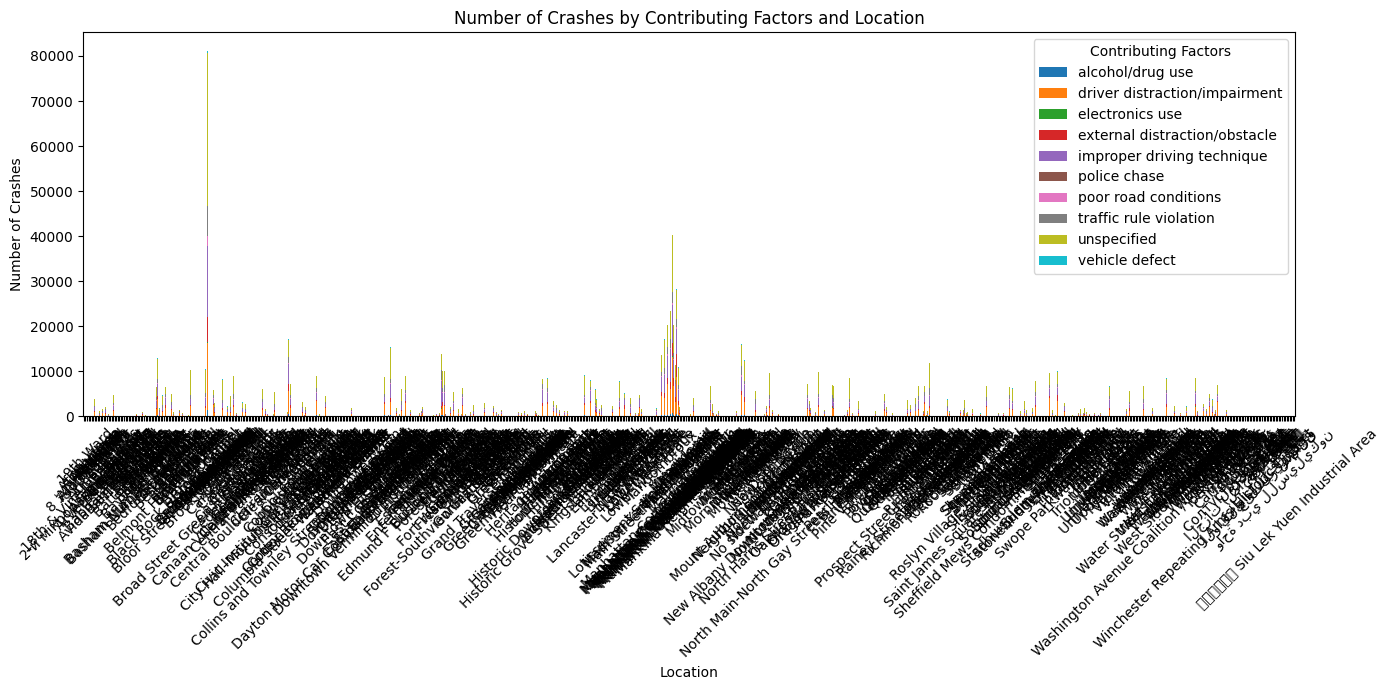

In [17]:
# Count number of crashes by location and contributing factor
location_factors = df.groupby(['NEIGHBOURHOOD', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='NUMBER OF CRASHES')

# Pivot the data for easier plotting
pivot_table = location_factors.pivot(index='NEIGHBOURHOOD', columns='CONTRIBUTING FACTOR VEHICLE 1', values='NUMBER OF CRASHES').fillna(0)

# Plot
pivot_table.plot(kind='bar', figsize=(14, 7), stacked=True)
plt.xlabel('Location')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Contributing Factors and Location')
plt.xticks(rotation=45)
plt.legend(title='Contributing Factors')
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
sub = df['SUBURB'].value_counts()
sub.head

<bound method NDFrame.head of SUBURB
Brooklyn              570346
Queens County         529981
Manhattan             397909
The Bronx             285173
Staten Island          95977
                       ...  
Cape Town Ward 116         1
Jardim São Paulo           1
Clayton                    1
Pawtucketville             1
الباهية                    1
Name: count, Length: 452, dtype: int64>

In [19]:
# Specify the values of interest
values_of_interest = [
    'Brooklyn',
    'Queens County',
    'Manhattan',
    'The Bronx',
    'Staten Island',
    'Queens',
    'Kings County'
]

# Count rows for each specified value
counts = {}
for value in values_of_interest:
    counts[value] = df[df['SUBURB'] == value].shape[0]

# Sum the counts
total = sum(counts.values())

print(total)

1900995


In [20]:
# Assuming df is your dataframe and CRASH DATE is the date column
# Ensure CRASH DATE is in datetime format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Add month and week of the year features
df['month_of_year'] = df['CRASH DATE'].dt.month
df['week_of_year'] = df['CRASH DATE'].dt.isocalendar().week


In [21]:
import folium

# Filter data for incidents where there was a fatality
df_fatalities = df[df['NUMBER OF PERSONS KILLED'] > 0]
df_fatalities = df_fatalities[df_fatalities['CRASH DATE'].dt.year == 2015]

# Calculate the mean latitude and longitude for the fatality data
mean_latitude_fatalities = df_fatalities['LATITUDE'].mean()
mean_longitude_fatalities = df_fatalities['LONGITUDE'].mean()

# Create a base map centered on the mean latitude and longitude values for fatality data
m = folium.Map(location=[mean_latitude_fatalities, mean_longitude_fatalities], zoom_start=12)

# Add points to the map for fatality data
for idx, row in df_fatalities.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=2,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# Display the map
m

In [22]:
# Specify the values of interest
values_of_interest = [
    'Brooklyn',
    'Queens County',
    'Manhattan',
    'The Bronx',
    'Staten Island',
    'Queens',
    'Kings County'
]

# Filter rows where SUBURB is not in values_of_interest
filtered_df = df[~df['SUBURB'].isin(values_of_interest)]

In [26]:
print(filtered_df.head(50))

      Unnamed: 0 CRASH DATE CRASH TIME   LATITUDE   LONGITUDE  \
34            34 2022-03-23      10:00  51.386357    0.105170   
40            40 2022-04-24       6:00   0.000000    0.000000   
43            43 2022-04-15       6:11   0.000000    0.000000   
207          207 2021-12-09       5:15   0.000000    0.000000   
245          245 2021-09-11       4:10   0.000000    0.000000   
528          528 2021-04-15       9:27   0.000000    0.000000   
748          748 2021-04-06      16:00   0.000000    0.000000   
860          860 2021-04-14      15:00   0.000000    0.000000   
905          905 2021-04-09      18:15  41.354588  -74.091856   
1099        1099 2021-04-14      11:10   0.000000    0.000000   
1475        1475 2021-03-25      20:00   0.000000    0.000000   
1555        1555 2021-04-17      11:39  40.733259  -73.506821   
1571        1571 2021-04-17      13:33  53.265403 -113.787996   
1926        1926 2022-02-14      17:23   0.000000    0.000000   
2204        2204 2021-04-